In [1]:
!nvidia-smi

Tue Oct 15 13:24:47 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.78                 Driver Version: 551.78         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   38C    P8              4W /   30W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

In [3]:
from ultralytics import YOLO
import os
from IPython.display import Image, display
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.196  Python-3.11.2 torch-2.1.2+cpu CPU (11th Gen Intel Core(TM) i7-11370H 3.30GHz)
Setup complete  (8 CPUs, 15.8 GB RAM, 194.4/206.1 GB disk)

OS                  Windows-10-10.0.22631-SP0
Environment         Windows
Python              3.11.2
Install             pip
RAM                 15.80 GB
CPU                 11th Gen Intel Core(TM) i7-11370H 3.30GHz
CUDA                None

matplotlib           3.8.2>=3.3.0
numpy                1.26.4>=1.22.2
opencv-python        4.10.0.84>=4.6.0
pillow               9.4.0>=7.1.2
pyyaml               6.0.1>=5.3.1
requests             2.31.0>=2.23.0
scipy                1.11.2>=1.4.1
torch                2.1.2>=1.8.0
torchvision          0.16.2>=0.9.0
tqdm                 4.66.1>=4.64.0
pandas               2.0.3>=1.1.4
seaborn              0.13.1>=0.11.0
psutil               5.9.5
py-cpuinfo           9.0.0
thop                 0.1.1-2209072238>=0.1.1


In [5]:
!pip install roboflow --user

  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="U8IGNxD0opU5hkBI9Vns")
project = rf.workspace("sinhalasignlanguagedetection-cfugs").project("sinhalasigndetection")
dataset = project.version(4).download("yolov8")


# from roboflow import Roboflow
# rf = Roboflow(api_key="U8IGNxD0opU5hkBI9Vns")
# project = rf.workspace("sinhalasignlanguagedetection-cfugs").project("sinhalasigndetection")
# dataset = project.version(1).download("yolov8")


# from roboflow import Roboflow
# rf = Roboflow(api_key="KlsdFAtf9tUHqG1szMW8")
# project = rf.workspace("anupama-gl7oo").project("signlanguagedetection-8j5fb")
# dataset = project.version(2).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to SinhalaSignDetection-4 in yolov8:: 100%|██████████| 8011/8011 [00:03<00:00, 2014.26it/s]


In [9]:
# Create settings.yaml file
settings_content = """
download:
  datasets: 'SinhalaSignDetection-4'
"""

settings_file_path = 'config/Ultralytics/settings.yaml'

with open(settings_file_path, 'w') as settings_file:
    settings_file.write(settings_content)

print(f"Settings.yaml file created at {settings_file_path}")


Settings.yaml file created at config/Ultralytics/settings.yaml


In [10]:
!yolo settings

 Learn about settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings
Printing 'C:\Users\Dilshan Karunarathne\AppData\Roaming\Ultralytics\settings.yaml'

settings_version: 0.0.4
datasets_dir: D:\Projects\0 WORK\Smart road condition checker\smart-road-condition-checker\ML\datasets
weights_dir: weights
runs_dir: runs
uuid: 36edad708fc9e3596ba70e4064f9212a28cc660ed0726f3ecf963c1710478455
sync: true
api_key: ''
clearml: true
comet: true
dvc: true
hub: true
mlflow: true
neptune: true
raytune: true
tensorboard: true
wandb: true



In [16]:
!yolo settings datasets_dir="D:\\Projects\\Udari\\sign language\\SignLanguageWeb"

 Learn about settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings
Printing 'C:\Users\Dilshan Karunarathne\AppData\Roaming\Ultralytics\settings.yaml'

settings_version: 0.0.4
datasets_dir: D:\\Projects\\Udari\\sign language\\SignLanguageWeb
weights_dir: weights
runs_dir: runs
uuid: 36edad708fc9e3596ba70e4064f9212a28cc660ed0726f3ecf963c1710478455
sync: true
api_key: ''
clearml: true
comet: true
dvc: true
hub: true
mlflow: true
neptune: true
raytune: true
tensorboard: true
wandb: true



In [17]:
!yolo train mode=train model=model/yolov8s.pt data=SinhalaSignDetection-4/data.yaml epochs=30 imgsz=640

^C


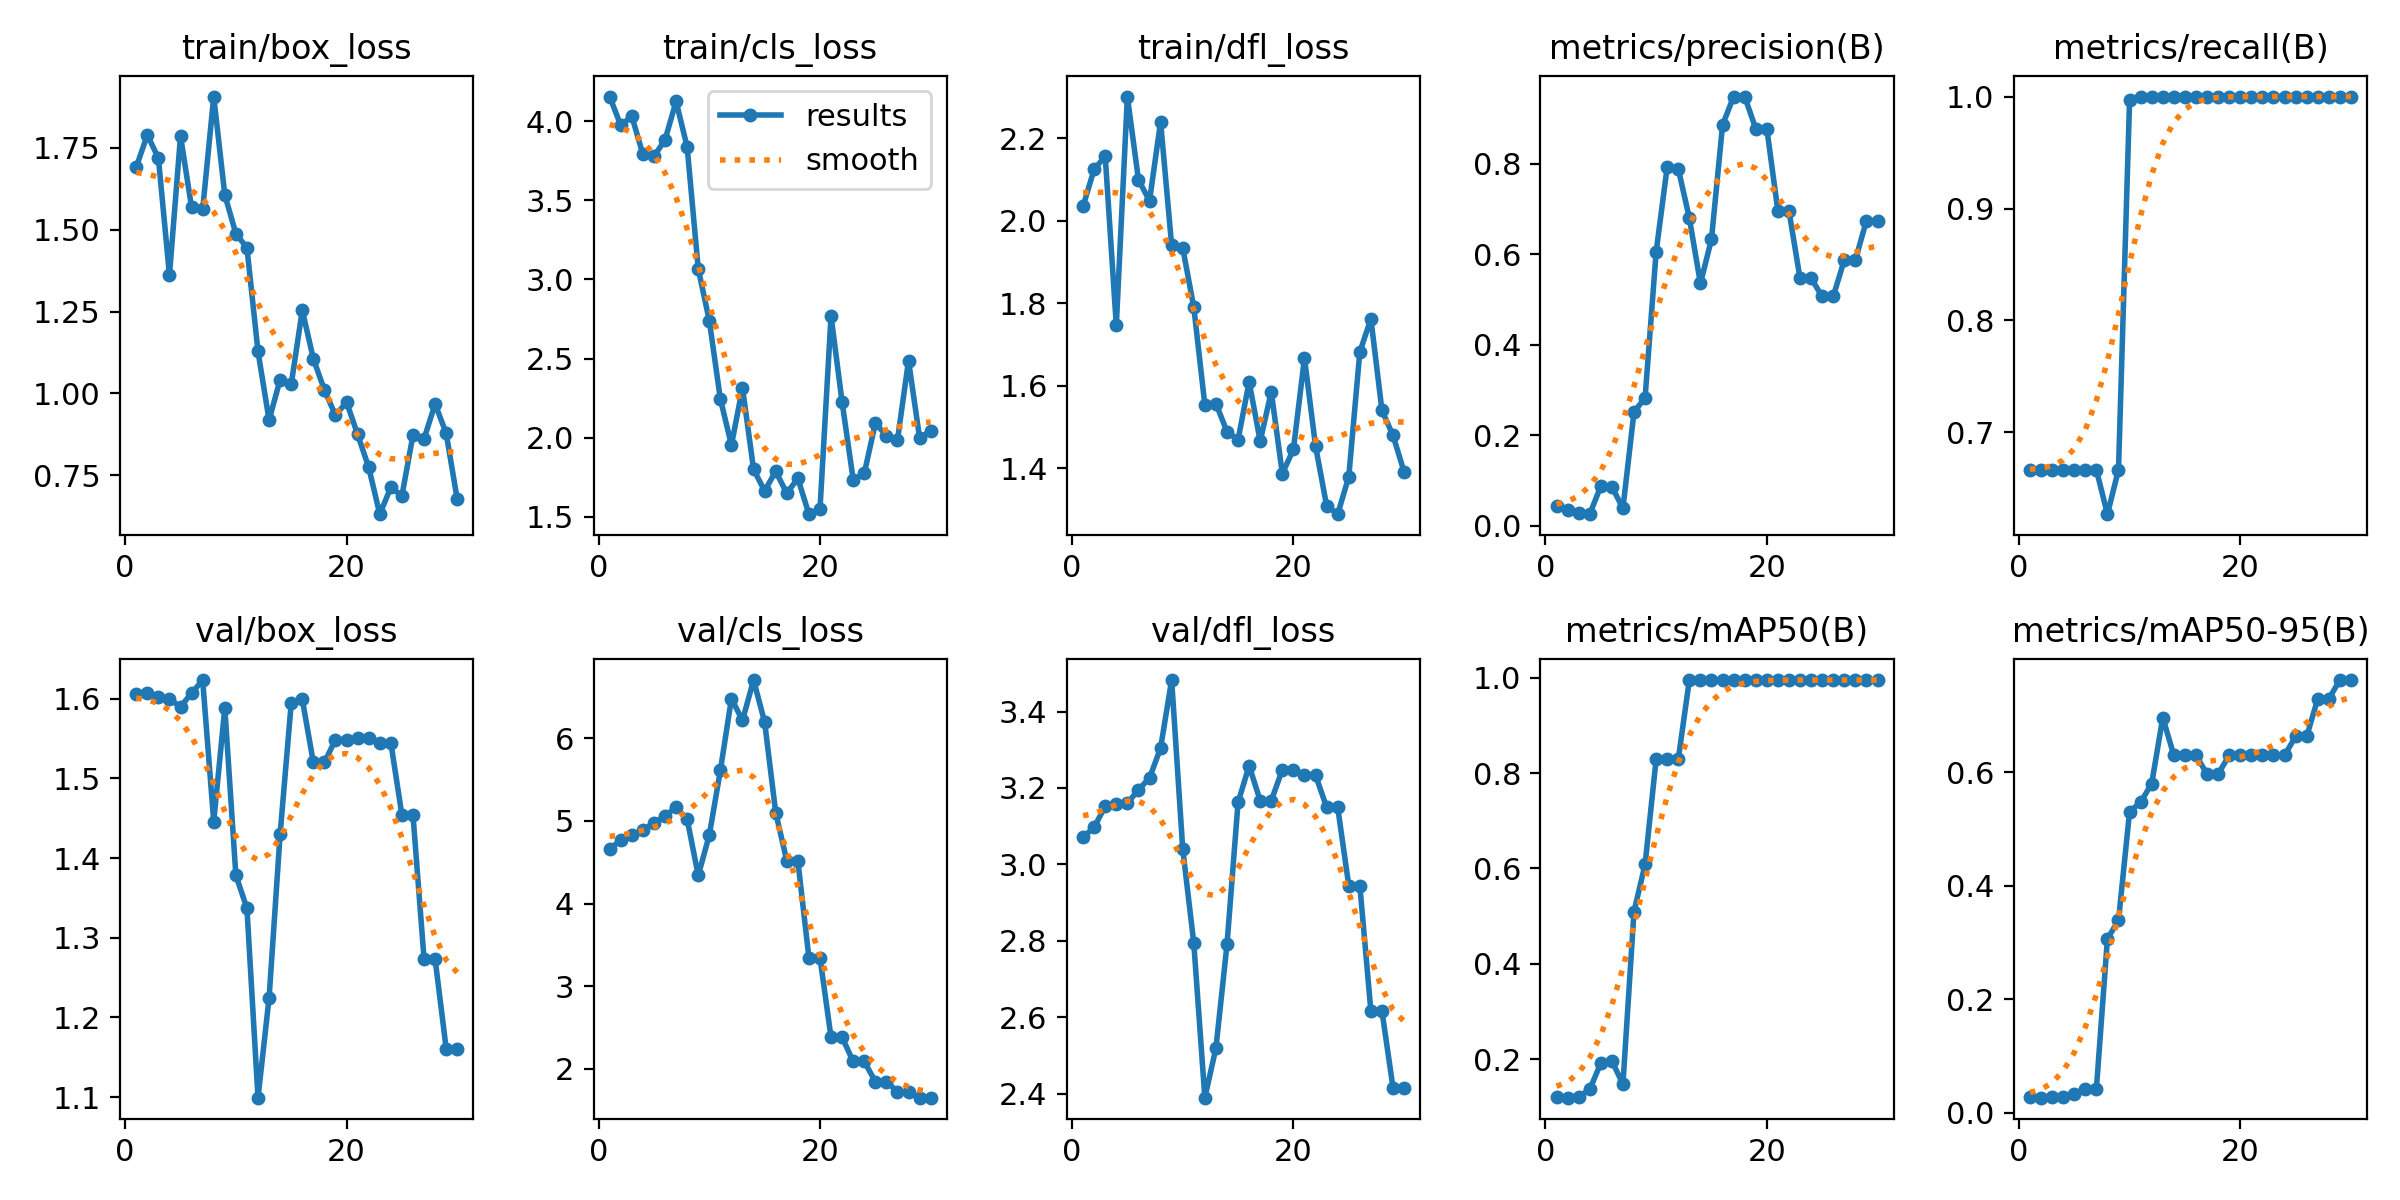

In [ ]:
from IPython.display import Image

Image(filename=f'results.png', width=600)

In [ ]:
import cv2
from ultralytics import YOLO
from IPython.display import display, Image
import numpy as np

# Load the YOLO model
model = YOLO('outmodels/best.pt')

# Initialize the video capture object
cap = cv2.VideoCapture(0)  # 0 is the default camera

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Make predictions
    results = model(frame)

    # Draw bounding boxes and labels on the frame
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy)
            label = box.label
            confidence = box.confidence

            # Draw the bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Put the label and confidence
            cv2.putText(frame, f'{label} {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Convert frame to JPEG format
    _, jpeg = cv2.imencode('.jpg', frame)
    display(Image(data=jpeg.tobytes()))

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()